# Flutter Estados
### Professor Elias Oliveira 2023

# Estados
* Para conversarmos com os usuários, precisamos realizar mudanças no estado da aplicação. 
* Basicamente, estado são os elementos que podem ser alterados quando um usuário realiza alguma ação.
* Basicamente, um estado é uma informação ou grupo de informações que são alteradas durante o tempo de execução do aplicativo. 
* Em um aplicativo Flutter, a alteração de estados ocorre sempre que uma informação precisa ser alterada, seja porque um usuário realizou uma ação ou através de uma nova informação recebida de um servidor. 
* Para criar o tipo de widget que aceita mudanças de estado, o Flutter faz uso do tipo stateful.
* Até o momento nas aplicações que mostramos as telas foram criadas extendendo os StatelessWidgets.

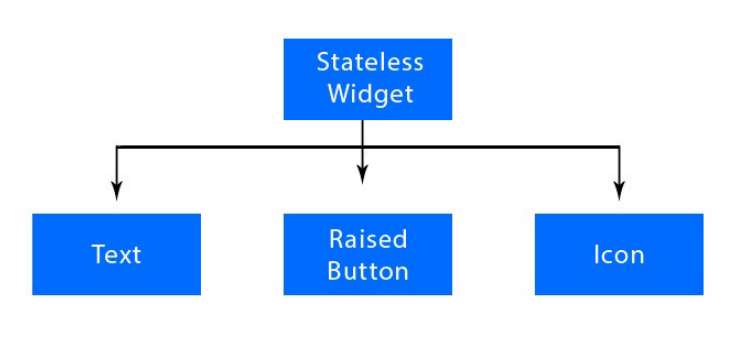

* Veja no exemplo abaixo

In [ ]:
import 'package:flutter/material.dart';

void main() => runApp(const MyApp());

class MyApp extends StatelessWidget {
  const MyApp({super.key});

  @override
  Widget build(BuildContext context) {
    return MaterialApp(
        title: 'Flutter layout demo',
        home: Scaffold(
            appBar: AppBar(
              title: const Text('Flutter layout demo'),
            ),
            body: Padding(
              padding: const EdgeInsets.all(25),
              child: Column(children: [
                ElevatedButton(
                    onPressed: () {}, child: const Text('I gotta pee')),
                ElevatedButton.icon(
                  onPressed: () {},
                  label: const Text('Plus One'),
                  icon: const Icon(Icons.plus_one),
                ) //ElevateButton
              ]), //Column
            ) //Padding
            ) //Scaffold
        ); //MaterialApp
  } //build
} //Myapp


## Stateful widgets
* Contêm estado e isso os torna mutáveis. 
* É por meio deles que construiremos boa parte das aplicações e componentes ao trabalhar com Flutter. 
* São elementos-chave para o desenvolvimento móvel da forma interativa que conhecemos. 
* Opte pelo Stateful somente quando você realmente precisar gerenciar estados.
* Na criação de um widget Stateless, precisamos basicamente de uma classe estendendo a classe StatelessWidget. 
* Já para os Statefuls, precisamos criar mais um passo: temos de pensar também na estrutura que cuida do estado. 
* O estado de um elemento basicamente controla o que é mutável nele.
* Sempre que uma variável, parâmetro ou similares mudam, automaticamente podemos comunicar ao Flutter que houve essa mudança através do método ´setState´, e ele executará uma reconstrução do widget alterado, atualizando na tela a exibição do elemento com o valor novo. 
* A estrutura padrão para tornar um widget Stateful é:

In [ ]:
import 'package:flutter/material.dart';

class MeuWidget extends StatefulWidget {
  @override
  _MeuWidgetState createState() => _MeuWidgetState();
}

class _MeuWidgetState extends State<MeuWidget> {
  @override
  Widget build(BuildContext context) {
    return Container();
  }
}

* Para atualizar a tela após algum estado (variável) ser alterada temos que chamar o método ***setState***
* Vamos criar um app que adiciona +1 a um contador e pode ser zerado.

In [ ]:
import 'package:flutter/material.dart';

void main() {
  runApp(MyApp());
}

class MyApp extends StatelessWidget {
  @override
  Widget build(BuildContext context) {
    return MaterialApp(
      theme: ThemeData(
        primarySwatch: Colors.blue,
        visualDensity: VisualDensity.adaptivePlatformDensity,
      ),
      home: MyHomePage(title: 'Exemplo de Stateful Widget'),
    );
  }
}

class MyHomePage extends StatefulWidget {
  MyHomePage({required this.title});

  final String title;

  @override
  _MyHomePageState createState() => _MyHomePageState();
}

class _MyHomePageState extends State<MyHomePage> {
  int _contador = 0;

  void _incrementarContador() {
    setState(() {
      _contador++;
    });
  }

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      appBar: AppBar(
        title: Text(widget.title),
      ),
      body: Center(
        child: Column(
          mainAxisAlignment: MainAxisAlignment.center,
          children: <Widget>[
            Text(
              '$_contador',
              style: Theme.of(context).textTheme.headline4,
            ),
            SizedBox(
              height: 20,
            ),
            ElevatedButton(
              onPressed: _incrementarContador,
              style: ElevatedButton.styleFrom(
                  backgroundColor: Colors.pink,
                  fixedSize: const Size(300, 100),
                  shape: RoundedRectangleBorder(
                      borderRadius: BorderRadius.circular(50))),
              child: const Text('Adicionar +1'),
            ),
            SizedBox(
              height: 10,
            ),
            ElevatedButton(
              onPressed: () {
                setState(() {
                  _contador = 0;
                });
              },
              style: ElevatedButton.styleFrom(
                  backgroundColor: Colors.pink,
                  fixedSize: const Size(300, 100),
                  shape: RoundedRectangleBorder(
                      borderRadius: BorderRadius.circular(50))),
              child: const Text('Zerar'),
            ),
          ],
        ),
      ),
    );
  }
}


## Formulários
* Agora vamos imaginar que voce tem um campo de texto numa aplicação e deseja usar o valor digitado para fazer um calculo. 
* Será necessário criar um widget ***TextField***, algumas das propriedades deste widget são:
    * InputDecoration: - o rótulo que será aplicado ao campo;
    * TextInputType: - Define o tipo que poderá ser diigitado
    * TextInputFormatter: - valida e formata os dados digitados
    * onChanged: reflete a entrada de texto na tela durante a digitação
    * onSubmitted: recebe a entrada de texto ao digitar o enter
* Abaixo usamos como exemplo uma calculadora que calcula o juros.

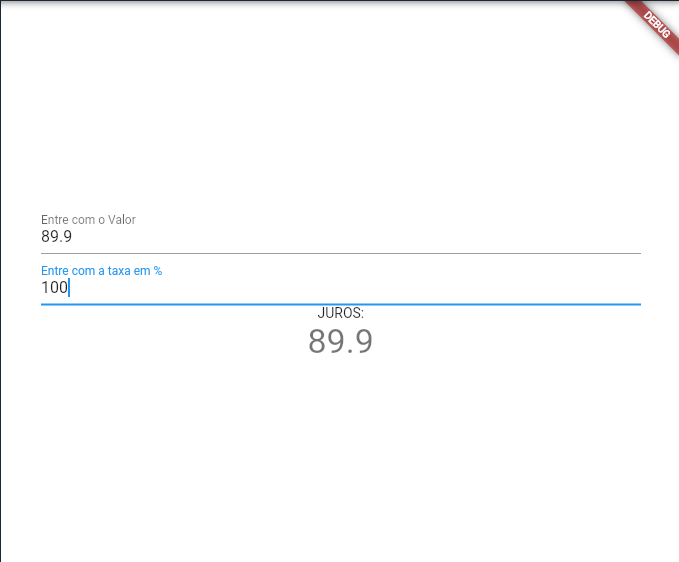

In [ ]:
import 'package:flutter/material.dart';
import 'package:flutter/services.dart';

void main() => runApp(MyApp());

class MyApp extends StatelessWidget {
  @override
  Widget build(BuildContext context) {
    return MaterialApp(
      home: HomePage(),
      theme: ThemeData(primarySwatch: Colors.blue),
    );
  }
}

class HomePage extends StatefulWidget {
  @override
  State<StatefulWidget> createState() {
    return HomePageState();
  }
}

class HomePageState extends State<HomePage> {
  double _valor = 0;
  double _taxa = 0;
  double _juros = 0;

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      backgroundColor: Colors.white,
      body: Container(
          padding: const EdgeInsets.all(40.0),
          child: Column(
            mainAxisAlignment: MainAxisAlignment.center,
            children: <Widget>[
              TextField(
                  decoration:
                      const InputDecoration(labelText: "Entre com o Valor"),
                  keyboardType: TextInputType.number,
                  inputFormatters: <TextInputFormatter>[
                    FilteringTextInputFormatter.allow(RegExp('[0-9.]')),
                  ], // Only numbers can be entered
                  onChanged: (String valor) {
                    setState(() {
                      _valor = double.parse(valor);
                      _juros = _valor * _taxa / 100;
                    });
                  }),
              TextField(
                  decoration:
                      const InputDecoration(labelText: "Entre com a taxa em %"),
                  keyboardType: TextInputType.number,
                  inputFormatters: <TextInputFormatter>[
                    FilteringTextInputFormatter.allow(RegExp('[0-9.]')),
                  ], // Only numbers can be entered
                  onChanged: (String valor) {
                    setState(() {
                      _taxa = double.parse(valor);
                      _juros = _valor * _taxa / 100;
                    });
                  }),
              Column(children: <Widget>[
                const Text("JUROS:"),
                Text(
                  '$_juros',
                  style: Theme.of(context).textTheme.headlineMedium,
                ),
              ]),
            ],
          )),
    );
  }
}

### Mãos na massa
* Alterar a aplicação para incluir um botão subtrai 1
* Altere a cor dos botões de acordo com o valor do contador:
    * 0 - Botões rosa
    * Positivo -  Botões verde
    * Negativo -Botões vermelho
* Altere a calculadora de juros para somente calcular após um botão ser precionado.

## Bibliografia
* https://www.devmedia.com.br/flutter-criando-layouts-com-center-column-e-row/40743
* https://docs.flutter.dev/development/ui/layout/tutorial
* https://flutterparainiciantes.com.br/interface/
* https://ateliware.com/blog/flutter-entendendo-a-construcao-de-um-layout
* https://www.kindacode.com/article/working-with-textbutton-in-flutter/
* https://fonts.google.com/icons
* https://www.alura.com.br/artigos/flutter-diferenca-entre-stateless-e-statefull-widget#widgets